In [ ]:
!pip install rembg
!pip install onnxruntime

In [1]:
from google.colab import files
uploaded = files.upload()

Saving person.jpg to person.jpg


In [2]:
from rembg import remove
from PIL import Image
import io

# Get uploaded file name
input_path = list(uploaded.keys())[0]
input_image = Image.open(input_path).convert("RGBA")
output_image = remove(input_image)
output_image.save("foreground.png")
print("Saved foreground.png")

100%|████████████████████████████████████████| 176M/176M [00:00<00:00, 235GB/s]


Saved foreground.png


In [3]:
import numpy as np

# Convert images to numpy
orig = np.array(input_image)
fg = np.array(output_image)

# Alpha mask from rembg result
alpha = fg[:, :, 3] / 255.0
alpha = np.expand_dims(alpha, axis=2)

# Recover background using inverse mask
background = orig[:, :, :3] * (1 - alpha)
background = background.astype(np.uint8)

# Save background
bg_image = Image.fromarray(background)
bg_image.save("background.png")

print("Saved background.png")

Saved background.png


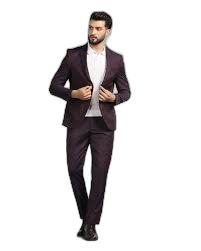

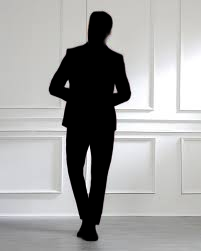

In [4]:
from PIL import Image
from IPython.display import display

foreground_image = Image.open('foreground.png')
display(foreground_image)

background_image = Image.open('background.png')
display(background_image)